In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Check the dimensions of dataframe

In [4]:
df.shape

(2768, 10)

### Check whether there are missing values in dataset

In [5]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check whether there are duplicate instances in dataframe

In [6]:
df.loc[df.duplicated()]

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Check the overall details about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


### Print all int and float type variables

In [8]:
print([x for x in df.columns if df[x].dtype in ('int64', 'float64')])

['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### Drop the Id column

In [9]:
df = df.drop('Id', axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Separate features and target

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Normalize the features using Min-Max Scaling

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Replace the original feature columns with the scaled ones

In [12]:
df[X.columns] = X_scaled

In [13]:
print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.318182  0.000000  0.416873   
1     0.058824  0.427136       0.540984       0.263636  0.000000  0.330025   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.289082   
3     0.058824  0.447236       0.540984       0.209091  0.111111  0.348635   
4     0.000000  0.688442       0.327869       0.318182  0.198582  0.534739   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.289082,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.209091,0.111111,0.348635,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.318182,0.198582,0.534739,0.943638,0.200000,1


### Correlation Heatmap

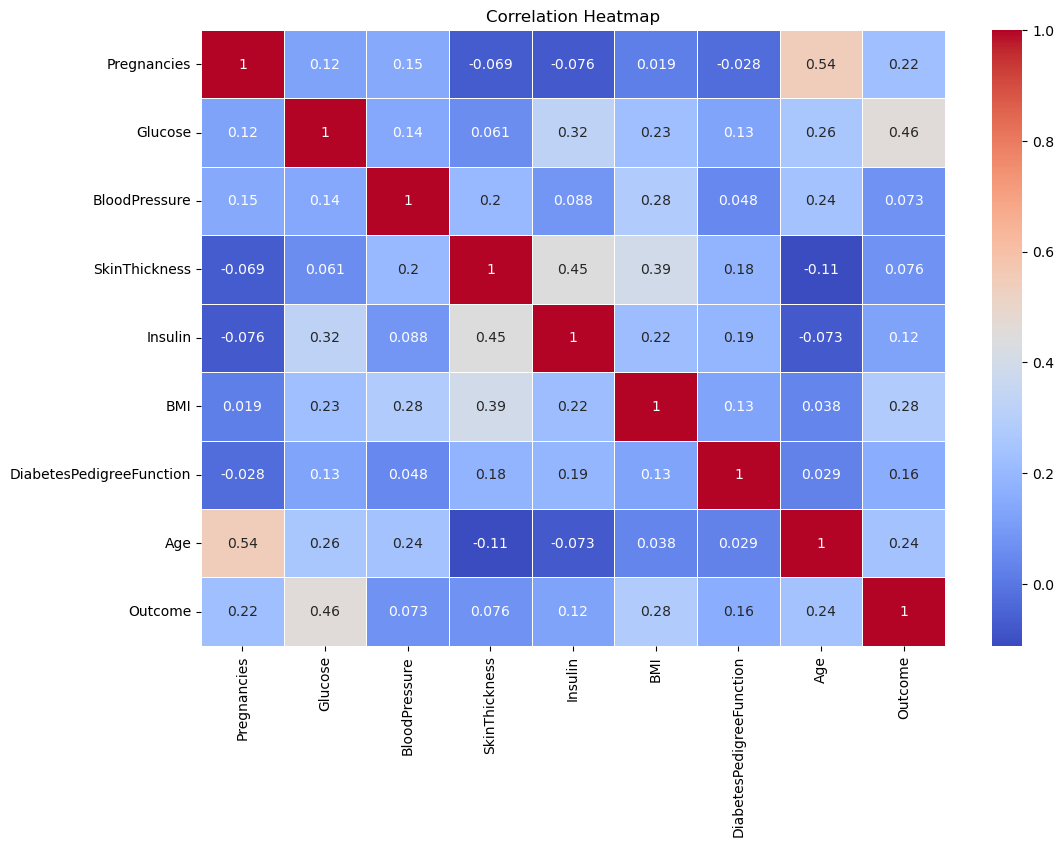

In [15]:
numerical_features = df.columns
cor_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Visualising Numerical Features

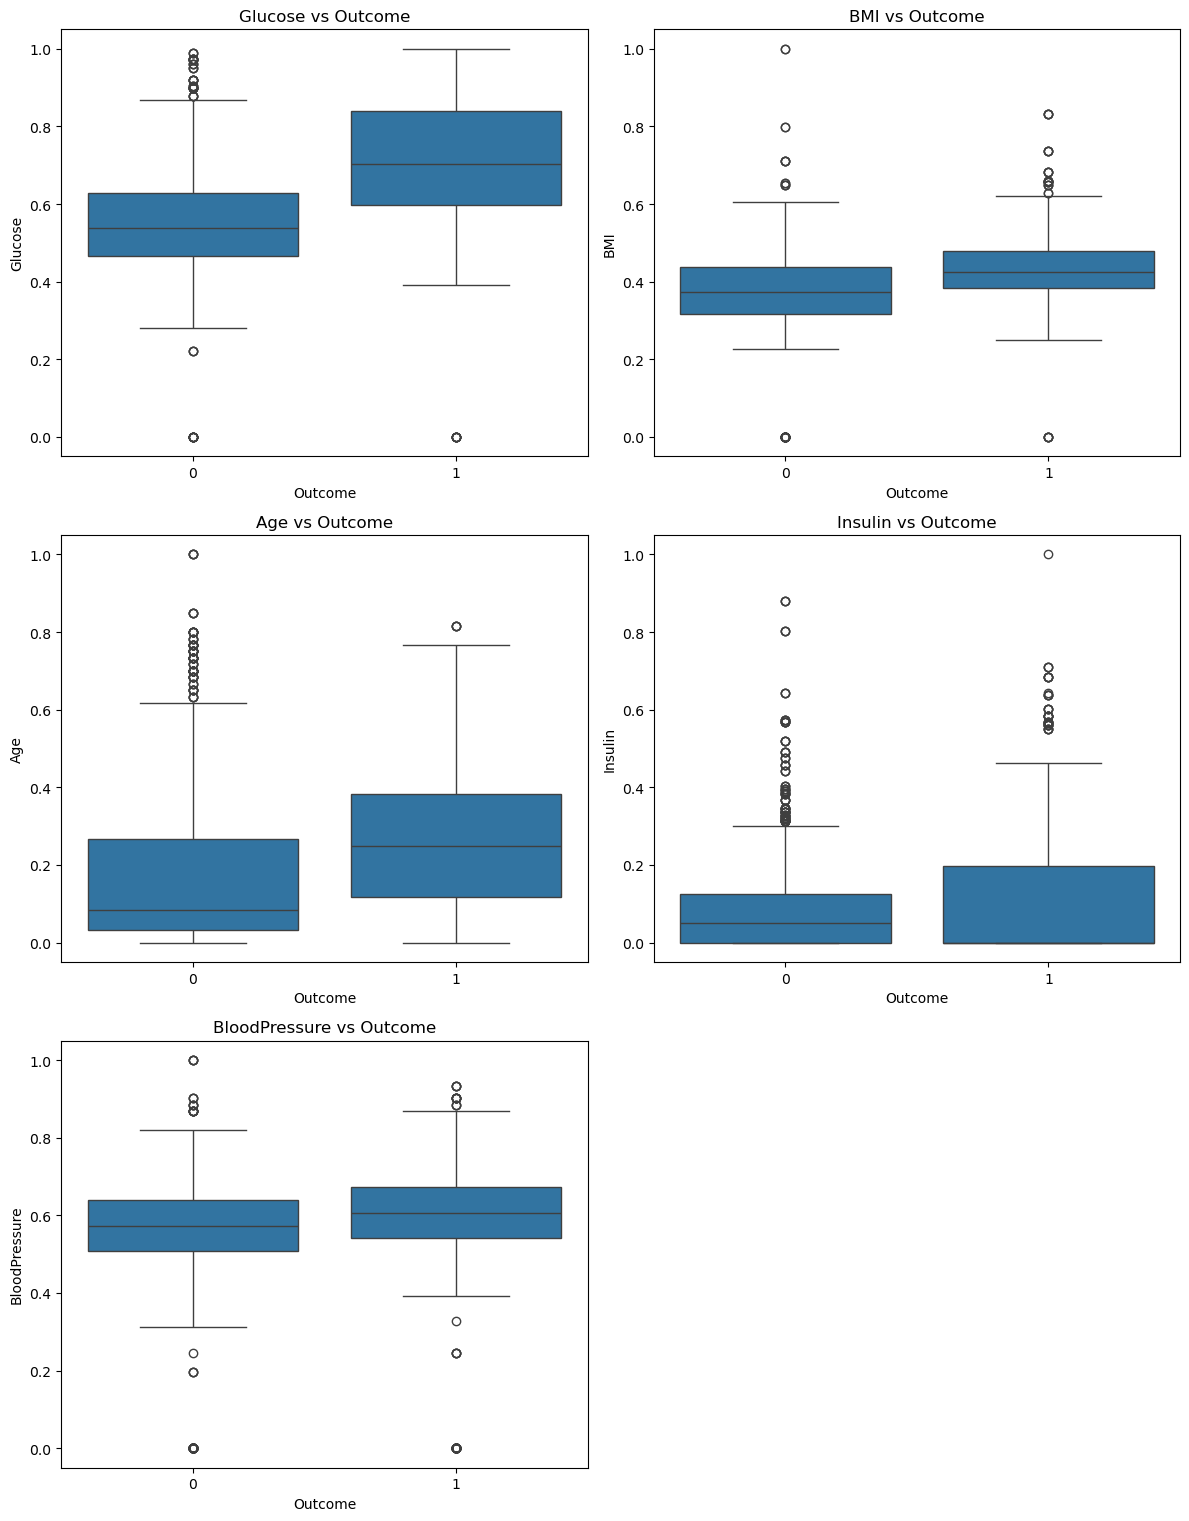

In [16]:
def boxplot(x, fig):
    plt.subplot(5, 2, fig)
    sns.boxplot(x='Outcome', y=x, data=df)
    plt.title(x + ' vs Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(x)

plt.figure(figsize=(12, 25))

boxplot('Glucose', 1)
boxplot('BMI', 2)
boxplot('Age', 3)
boxplot('Insulin', 4)
boxplot('BloodPressure', 5)

plt.tight_layout()
plt.show()

### Feature Distribution and Outcome Comparison

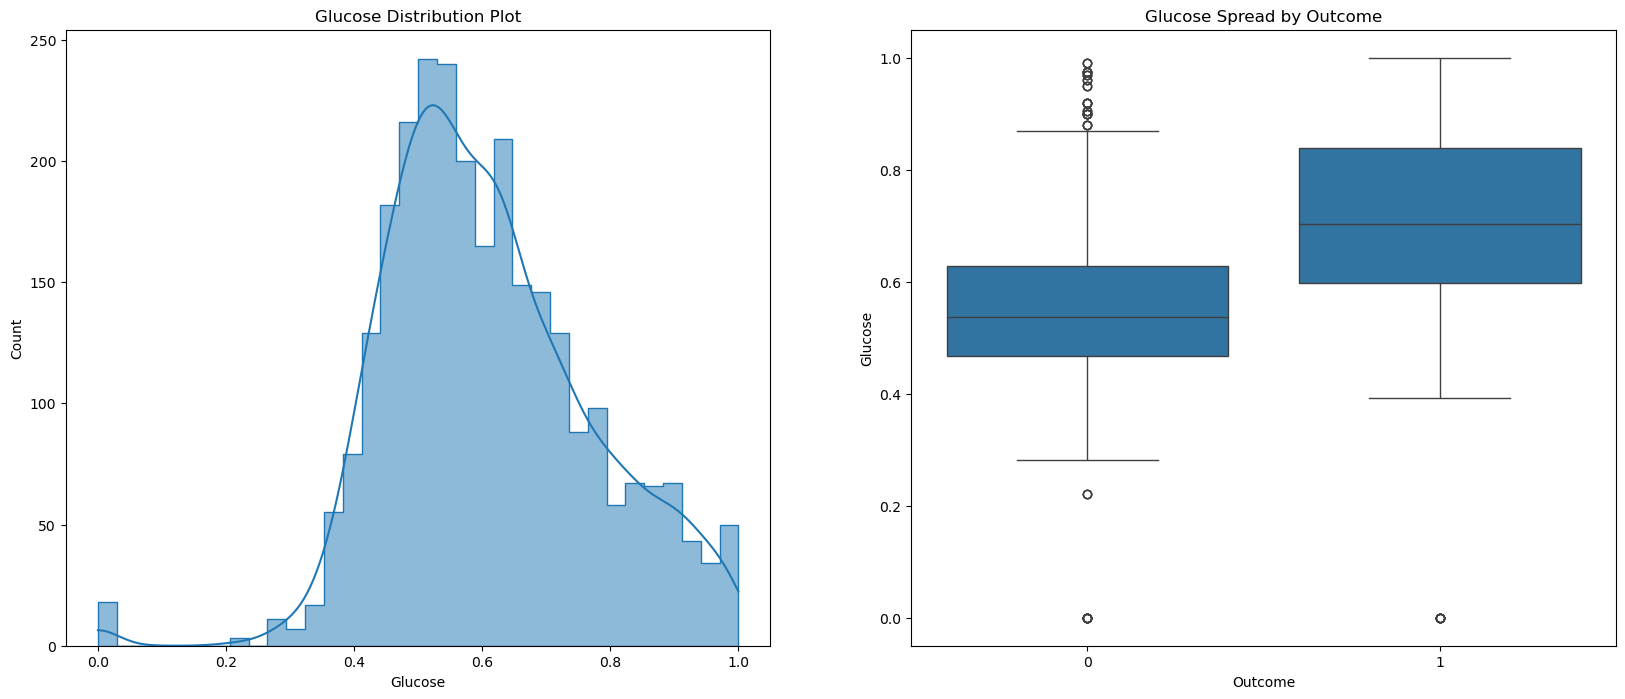

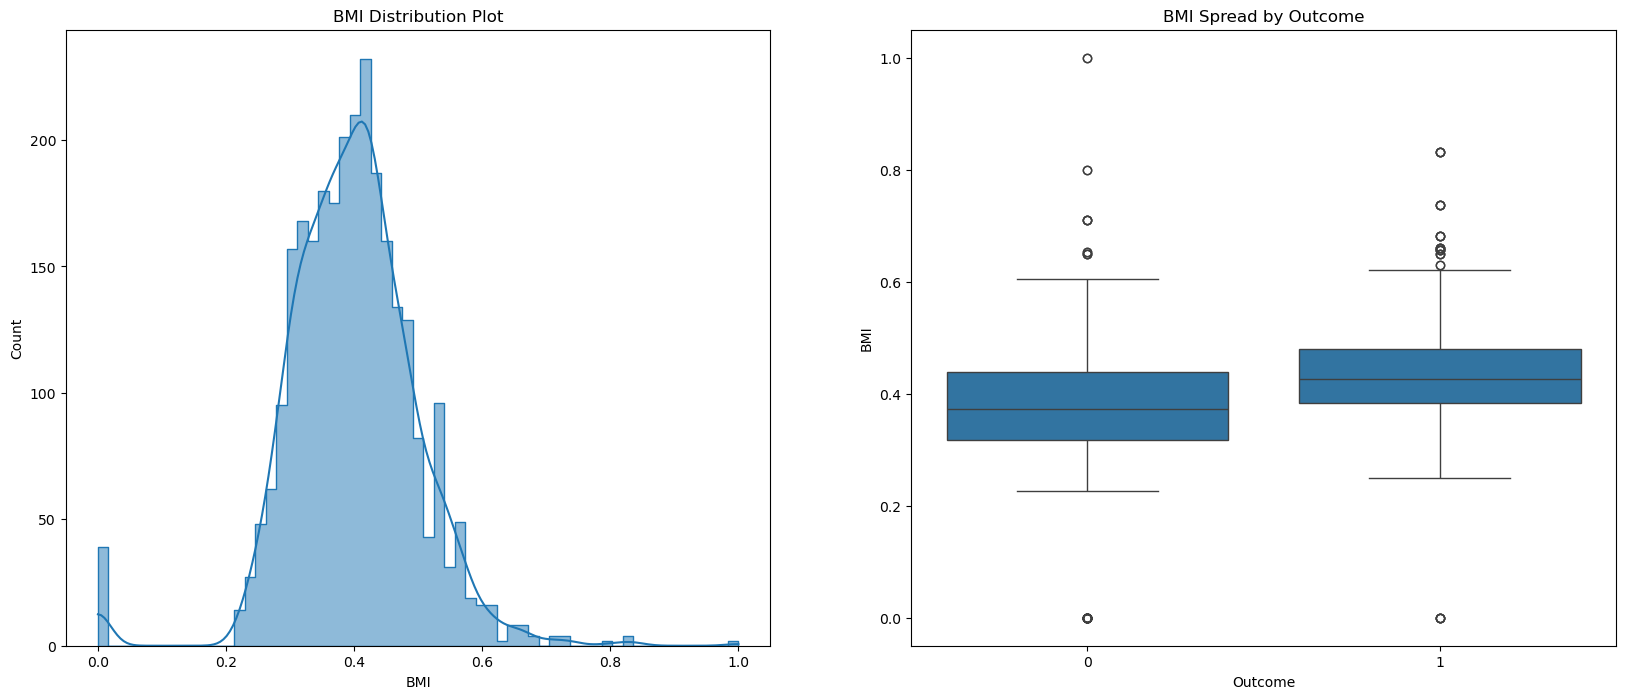

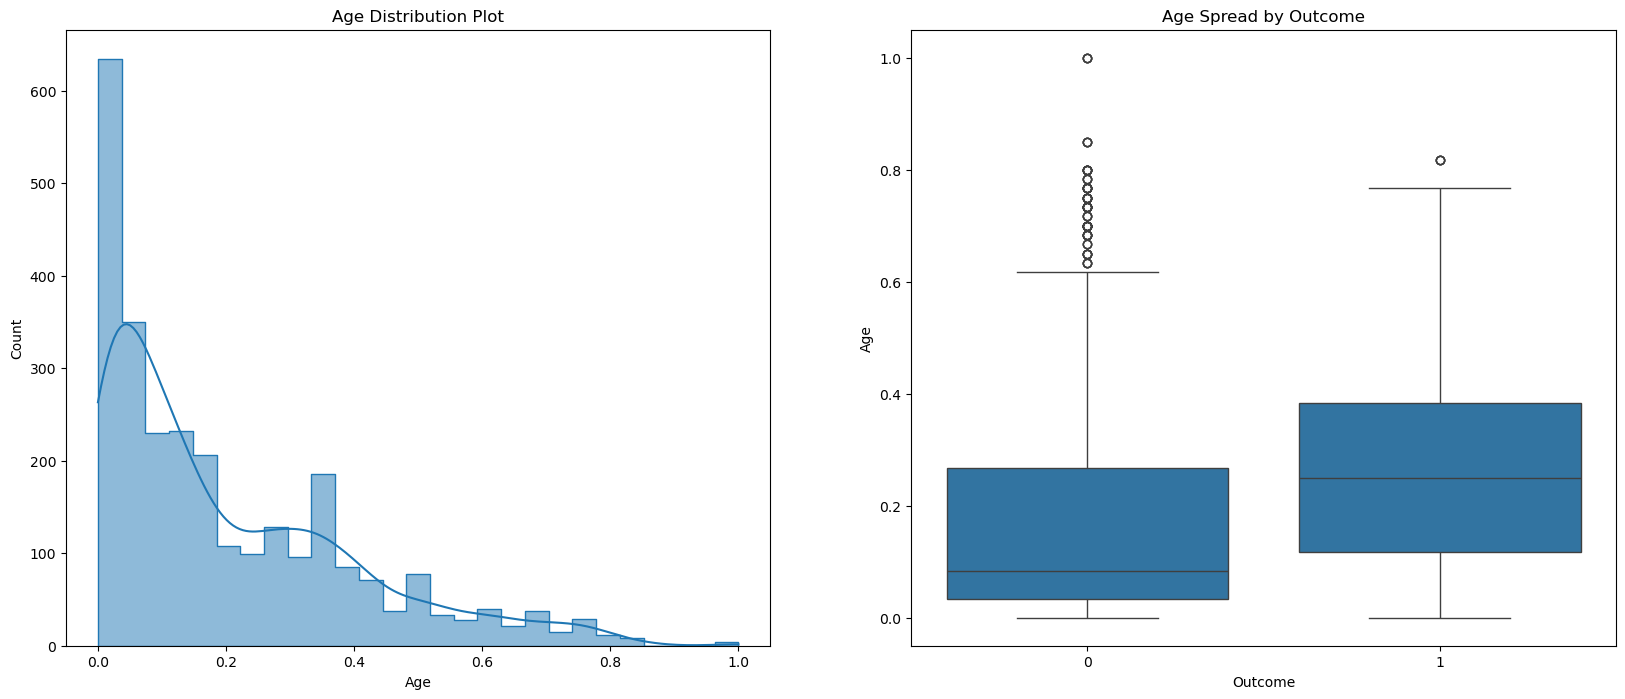

In [17]:
for col in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, element='step')
    plt.title(f'{col} Distribution Plot')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} Spread by Outcome')
    
    plt.show()


### Split dataset into Train, Validation and  Test

In [18]:
features = df.columns.drop('Outcome')
target = 'Outcome'

X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target],
    train_size=0.85, test_size=0.15, random_state=1234
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    train_size=0.85, test_size=0.15, random_state=1234
)

 ### Dataset Splitting Overview

In [20]:
X_train.shape, X_val.shape, X_test.shape

((1999, 8), (353, 8), (416, 8))

### Initialize and train Decision Tree Classifier

In [21]:
dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred = dt_model.predict(X_test)

### Visualize Confusion Matrix

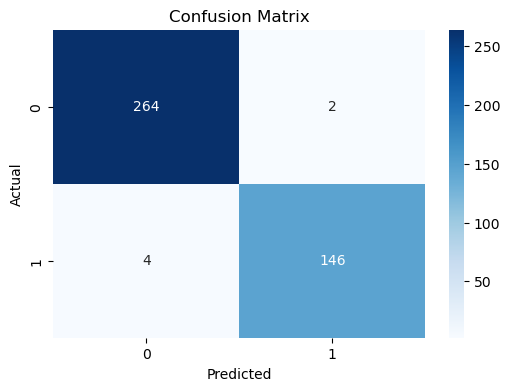

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Evaluate Accuracy, Precision, Recall and F1 Score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")

Accuracy: 0.9855769230769231
Precision: 0.9864864864864865
Recall: 0.9733333333333334
F1 Score: 0.9798657718120806
